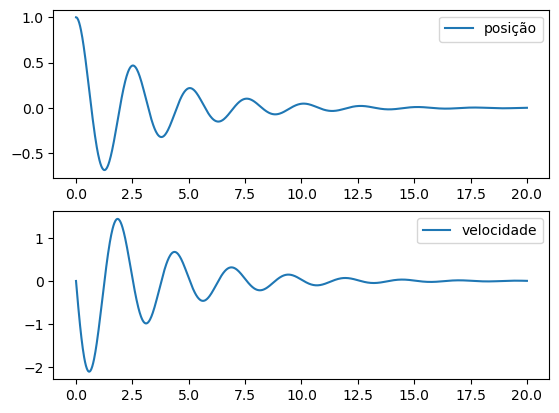

In [ ]:
'''
Define a equação do oscilador harmônico e um array com os tempos para
serem utilizados nos parâmetros da função solve_ivp.

O solve_ivp retorna um array com os tempos requisitados, outro com valores
da posição, e um último com os valores da velocidade. Para acessar separadamente os 
arrays, utiliza-se .t(array com tempos), .y(array com os valores do vetor, tanto posição quanto velocidade).
'''
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

y0 = np.array([1, 0])

def oh(t, y, w, b):
  f = np.array([y[1], - w*y[0] - b*y[1]])
  return f

tempo = np.linspace(0, 20, 1000)
Y = solve_ivp(oh, [0, tempo[-1]], y0, t_eval=tempo, args=(2*np.pi, 0.6)) # wa² = w0² - (gamma/2)²

plt.subplot(211)
plt.plot(Y.t, Y.y[0], label='posição')
plt.legend()

plt.subplot(212)
plt.plot(Y.t, Y.y[1], label='velocidade')
plt.legend()

plt.show()